<a href="https://colab.research.google.com/github/Rey1380/Face-detection-and-Face-Landmarks-cropping/blob/main/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

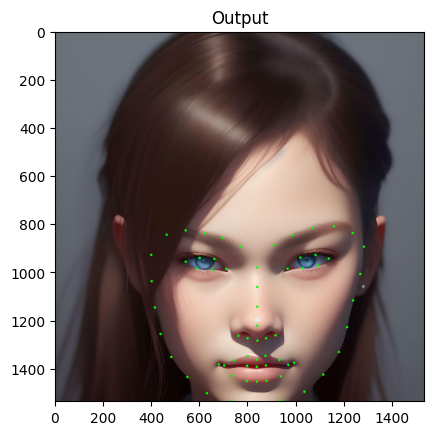

In [ ]:
import numpy as np
import dlib
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/drive/MyDrive/fotor-ai-20230621151734.jpg')
# import the necessary packages
from imutils import face_utils
import dlib
import cv2
z=0
landmarks_points=[]
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/shape_predictor_68_face_landmarks5.dat')
while True:
    # load the input image and convert it to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale image
    rects = detector(gray, 0)
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(image, (x, y),5, (0, 255, 0), -1)
            landmarks_points.append((x, y))
    # show the output image with the face detections + facial landmarks
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Output")
    plt.show()
    z=z+1
    k = cv2.waitKey(5) & 0xFF
    if z == 1:
        break
cv2.destroyAllWindows()


In [ ]:
for (x, y) in shape:
  print('[x,y]=[{:5.2f},{:5.2f}] '.format(x, y))



[x,y]=[399.00,929.00] 
[x,y]=[401.00,1038.00] 
[x,y]=[414.00,1147.00] 
[x,y]=[438.00,1257.00] 
[x,y]=[482.00,1353.00] 
[x,y]=[549.00,1436.00] 
[x,y]=[630.00,1503.00] 
[x,y]=[729.00,1537.00] 
[x,y]=[834.00,1543.00] 
[x,y]=[939.00,1534.00] 
[x,y]=[1035.00,1497.00] 
[x,y]=[1113.00,1426.00] 
[x,y]=[1178.00,1332.00] 
[x,y]=[1212.00,1229.00] 
[x,y]=[1237.00,1118.00] 
[x,y]=[1267.00,1008.00] 
[x,y]=[1282.00,895.00] 
[x,y]=[463.00,845.00] 
[x,y]=[542.00,827.00] 
[x,y]=[621.00,840.00] 
[x,y]=[696.00,858.00] 
[x,y]=[768.00,894.00] 
[x,y]=[908.00,888.00] 
[x,y]=[986.00,847.00] 
[x,y]=[1068.00,817.00] 
[x,y]=[1157.00,810.00] 
[x,y]=[1235.00,838.00] 
[x,y]=[839.00,981.00] 
[x,y]=[839.00,1062.00] 
[x,y]=[839.00,1144.00] 
[x,y]=[839.00,1223.00] 
[x,y]=[761.00,1265.00] 
[x,y]=[799.00,1275.00] 
[x,y]=[840.00,1285.00] 
[x,y]=[876.00,1275.00] 
[x,y]=[915.00,1263.00] 
[x,y]=[542.00,957.00] 
[x,y]=[600.00,942.00] 
[x,y]=[661.00,946.00] 
[x,y]=[710.00,987.00] 
[x,y]=[652.00,991.00] 
[x,y]=[590.00,985.00] 
[

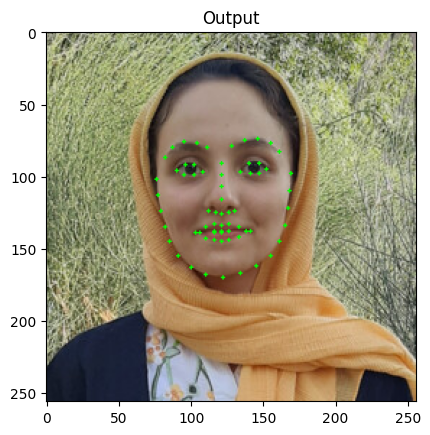

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image1 = cv2.imread('/content/drive/MyDrive/rey.jpg')
# plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
# plt.title("image")
# plt.show()

p=0
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor

while True:
    # load the input image and convert it to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale image
    rects1 = detector(gray1, 0)

    # loop over the face detections
    for (i1, rect1) in enumerate(rects1):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape1 = predictor(gray1, rect1)
        shape1 = face_utils.shape_to_np(shape1)

        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x1, y1) in shape1:
            cv2.circle(image1, (x1, y1), 1, (0, 255, 0), -1)

    # show the output image with the face detections + facial landmarks
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title("Output")
    plt.show()
    p=p+1
    k = cv2.waitKey(5) & 0xFF
    if p == 1:
        break

cv2.destroyAllWindows()


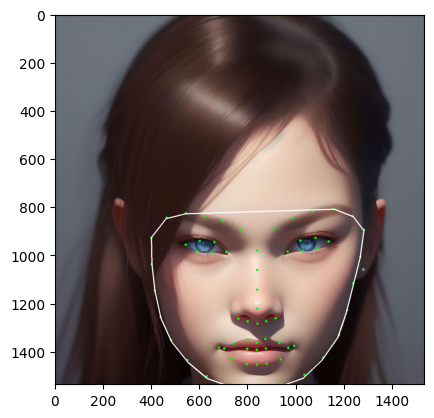

In [ ]:
face_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
body_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Create empty matrices in the images' shapes
height, width = face_gray.shape
mask = np.zeros((height, width), np.uint8)

height, width, channels = image1.shape
rect = detector(face_gray)[0]
landmarks = predictor(face_gray, rect)
landmarks_points = []

def get_landmarks(landmarks, landmarks_points):
  for n in range(68):
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      landmarks_points.append((x, y))

get_landmarks(landmarks, landmarks_points)
points = np.array(landmarks_points, np.int32)
convexhull = cv2.convexHull(points)

face_cp = image.copy()
plt.imshow(cv2.cvtColor((cv2.polylines(face_cp, [convexhull], True, (255,255,255), 3)), cv2.COLOR_BGR2RGB))

face_image_1 = cv2.bitwise_and(image, image, mask=mask)

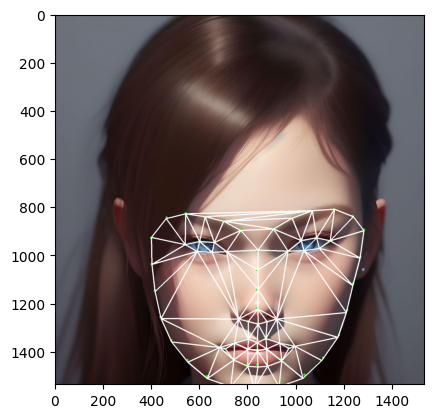

In [ ]:
rect = cv2.boundingRect(convexhull)
subdiv = cv2.Subdiv2D(rect) # Creates an instance of Subdiv2D
subdiv.insert(landmarks_points) # Insert points into subdiv
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

indexes_triangles = []
face_cp = image.copy()

def get_index(arr):
    index = 0
    if arr[0]:
        index = arr[0][0]
    return index

for triangle in triangles :

    # Gets the vertex of the triangle
    pt1 = (triangle[0], triangle[1])
    pt2 = (triangle[2], triangle[3])
    pt3 = (triangle[4], triangle[5])

    # Draws a line for each side of the triangle
    cv2.line(face_cp, pt1, pt2, (255, 255, 255), 3,  0)
    cv2.line(face_cp, pt2, pt3, (255, 255, 255), 3,  0)
    cv2.line(face_cp, pt3, pt1, (255, 255, 255), 3,  0)

    index_pt1 = np.where((points == pt1).all(axis=1))
    index_pt1 = get_index(index_pt1)
    index_pt2 = np.where((points == pt2).all(axis=1))
    index_pt2 = get_index(index_pt2)
    index_pt3 = np.where((points == pt3).all(axis=1))
    index_pt3 = get_index(index_pt3)

    # Saves coordinates if the triangle exists and has 3 vertices
    if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
        vertices = [index_pt1, index_pt2, index_pt3]
        indexes_triangles.append(vertices)

# Draw delaunay triangles
plt.imshow(cv2.cvtColor(face_cp, cv2.COLOR_BGR2RGB))

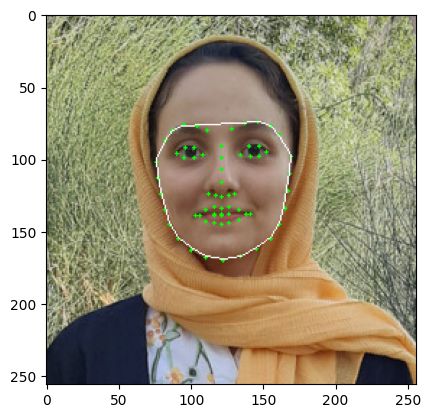

In [ ]:
# Getting landmarks for the face that will have the first one swapped into
rect2 = detector(body_gray)[0]

# This creates a with 68 pairs of integer values — these values are the (x, y)-coordinates of the facial structures
landmarks_2 = predictor(body_gray, rect2)
landmarks_points2 = []

# Uses the function declared previously to get a list of the landmark coordinates
get_landmarks(landmarks_2, landmarks_points2)

# Generates a convex hull for the second person
points2 = np.array(landmarks_points2, np.int32)
convexhull2 = cv2.convexHull(points2)

body_cp = image1.copy()
plt.imshow(cv2.cvtColor((cv2.polylines(body_cp, [convexhull2], True, (255,255,255), 1)), cv2.COLOR_BGR2RGB))

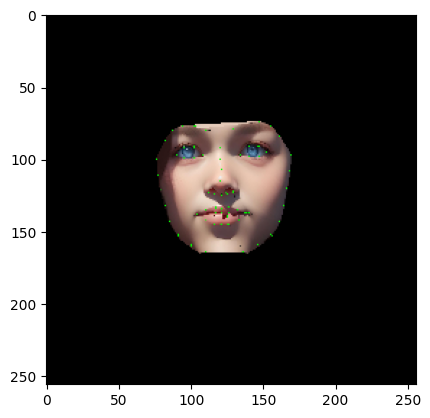

In [ ]:
lines_space_new_face = np.zeros((height, width, channels), np.uint8)
body_new_face = np.zeros((height, width, channels), np.uint8)

height, width = face_gray.shape
lines_space_mask = np.zeros((height, width), np.uint8)


for triangle in indexes_triangles:

    # Coordinates of the first person's delaunay triangles
    pt1 = landmarks_points[triangle[0]]
    pt2 = landmarks_points[triangle[1]]
    pt3 = landmarks_points[triangle[2]]

    # Gets the delaunay triangles
    (x, y, widht, height) = cv2.boundingRect(np.array([pt1, pt2, pt3], np.int32))
    cropped_triangle = image[y: y+height, x: x+widht]
    cropped_mask = np.zeros((height, widht), np.uint8)

    # Fills triangle to generate the mask
    points = np.array([[pt1[0]-x, pt1[1]-y], [pt2[0]-x, pt2[1]-y], [pt3[0]-x, pt3[1]-y]], np.int32)
    cv2.fillConvexPoly(cropped_mask, points, 255)

    # Draws lines for the triangles
    cv2.line(lines_space_mask, pt1, pt2, 255)
    cv2.line(lines_space_mask, pt2, pt3, 255)
    cv2.line(lines_space_mask, pt1, pt3, 255)

    lines_space = cv2.bitwise_and(image, image, mask=lines_space_mask)

    # Calculates the delaunay triangles of the second person's face

    # Coordinates of the first person's delaunay triangles
    pt1 = landmarks_points2[triangle[0]]
    pt2 = landmarks_points2[triangle[1]]
    pt3 = landmarks_points2[triangle[2]]

    # Gets the delaunay triangles
    (x, y, widht, height) = cv2.boundingRect(np.array([pt1, pt2, pt3], np.int32))
    cropped_mask2 = np.zeros((height,widht), np.uint8)

    # Fills triangle to generate the mask
    points2 = np.array([[pt1[0]-x, pt1[1]-y], [pt2[0]-x, pt2[1]-y], [pt3[0]-x, pt3[1]-y]], np.int32)
    cv2.fillConvexPoly(cropped_mask2, points2, 255)

    # Deforms the triangles to fit the subject's face : https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html
    points =  np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)  # Warps the content of the first triangle to fit in the second one
    dist_triangle = cv2.warpAffine(cropped_triangle, M, (widht, height))
    dist_triangle = cv2.bitwise_and(dist_triangle, dist_triangle, mask=cropped_mask2)

    # Joins all the distorted triangles to make the face mask to fit in the second person's features
    body_new_face_rect_area = body_new_face[y: y+height, x: x+widht]
    body_new_face_rect_area_gray = cv2.cvtColor(body_new_face_rect_area, cv2.COLOR_BGR2GRAY)

    # Creates a mask
    masked_triangle = cv2.threshold(body_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    dist_triangle = cv2.bitwise_and(dist_triangle, dist_triangle, mask=masked_triangle[1])

    # Adds the piece to the face mask
    body_new_face_rect_area = cv2.add(body_new_face_rect_area, dist_triangle)
    body_new_face[y: y+height, x: x+widht] = body_new_face_rect_area

plt.imshow(cv2.cvtColor(body_new_face, cv2.COLOR_BGR2RGB))

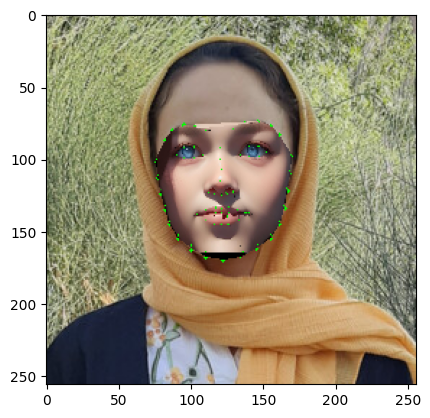

In [ ]:
body_face_mask = np.zeros_like(body_gray)
body_head_mask = cv2.fillConvexPoly(body_face_mask, convexhull2, 255)
body_face_mask = cv2.bitwise_not(body_head_mask)

body_maskless = cv2.bitwise_and(image1, image1, mask=body_face_mask)
result = cv2.add(body_maskless, body_new_face)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))


True

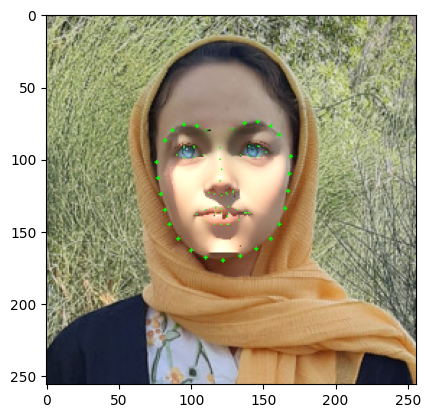

In [ ]:
# Gets the center of the face for the body
(x, y, widht, height) = cv2.boundingRect(convexhull2)
center_face2 = (int((x+x+widht)/2), int((y+y+height)/2))

seamlessclone = cv2.seamlessClone(result, image1, body_head_mask, center_face2, cv2.NORMAL_CLONE)

plt.imshow(cv2.cvtColor(seamlessclone, cv2.COLOR_BGR2RGB))

cv2.imwrite("./result.png", seamlessclone)